In [1]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
# function and derivatives
def f(x,y):
    return 3*x**2 + 4*y**2 - 4*x*y + 2*y +3*x+ 8

def dfdx(x,y):
    return 6*x-4*y+4

def dfdy(x,y):
    return -4*x+8*y+2

def vector(x,y):
    return np.array([dfdx(x,y), dfdy(x,y)])

In [3]:
def gd(vector,x_prev,learn_rate):

    epsilon = 0.0001
    grad_itter = 1

    seq_x = [x_prev[0]]
    seq_y = [x_prev[1]]

    momentum = 0.9
    change = 0

    new_change = learn_rate*((1 - momentum)*vector(x_prev[0],x_prev[1])+change*momentum)

    x_next = np.subtract(x_prev, new_change)

    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])

    change = new_change
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:

        x_prev = x_next
        new_change = learn_rate*((1 - momentum)*vector(x_prev[0],x_prev[1])+change*momentum)
        x_next = np.subtract(x_prev, new_change)
        grad_itter += 1
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
        change = new_change

    return (x_next, grad_itter, seq_x, seq_y)

In [4]:
def adam_optimization(vector, x_prev, learning_rate, momentum_decay=0.9, scaling_decay=0.999, e=1e-8):

    epsilon = 0.0001
    grad_itter = 1

    seq_x = [x_prev[0]]
    seq_y = [x_prev[1]]

    momentum = np.array([0, 0])
    second_momentum = np.array([0, 0])
    unbias = np.array([0, 0])
    second_unbias = np.array([0, 0])

    momentum = momentum_decay * momentum + (1 - momentum_decay)*vector(*x_prev)
    second_momentum = scaling_decay * second_momentum + (1 - scaling_decay)*vector(*x_prev)**2
    unbias = momentum / (1 - momentum_decay**grad_itter)
    second_unbias = second_momentum / (1 - scaling_decay**grad_itter)

    x_next = x_prev - learning_rate * unbias / (np.sqrt(second_unbias) + e)


    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:

        x_prev = x_next

        momentum = momentum_decay * momentum + (1 - momentum_decay)*vector(*x_prev)
        second_momentum = scaling_decay * second_momentum + (1 - scaling_decay)*vector(*x_prev)**2
        unbias = momentum / (1 - momentum_decay**grad_itter)
        second_unbias = second_momentum / (1 - scaling_decay**grad_itter)

        x_next = x_prev - learning_rate * unbias / (np.sqrt(second_unbias) + e)

        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])

        grad_itter += 1

    return (x_next, grad_itter, seq_x, seq_y)

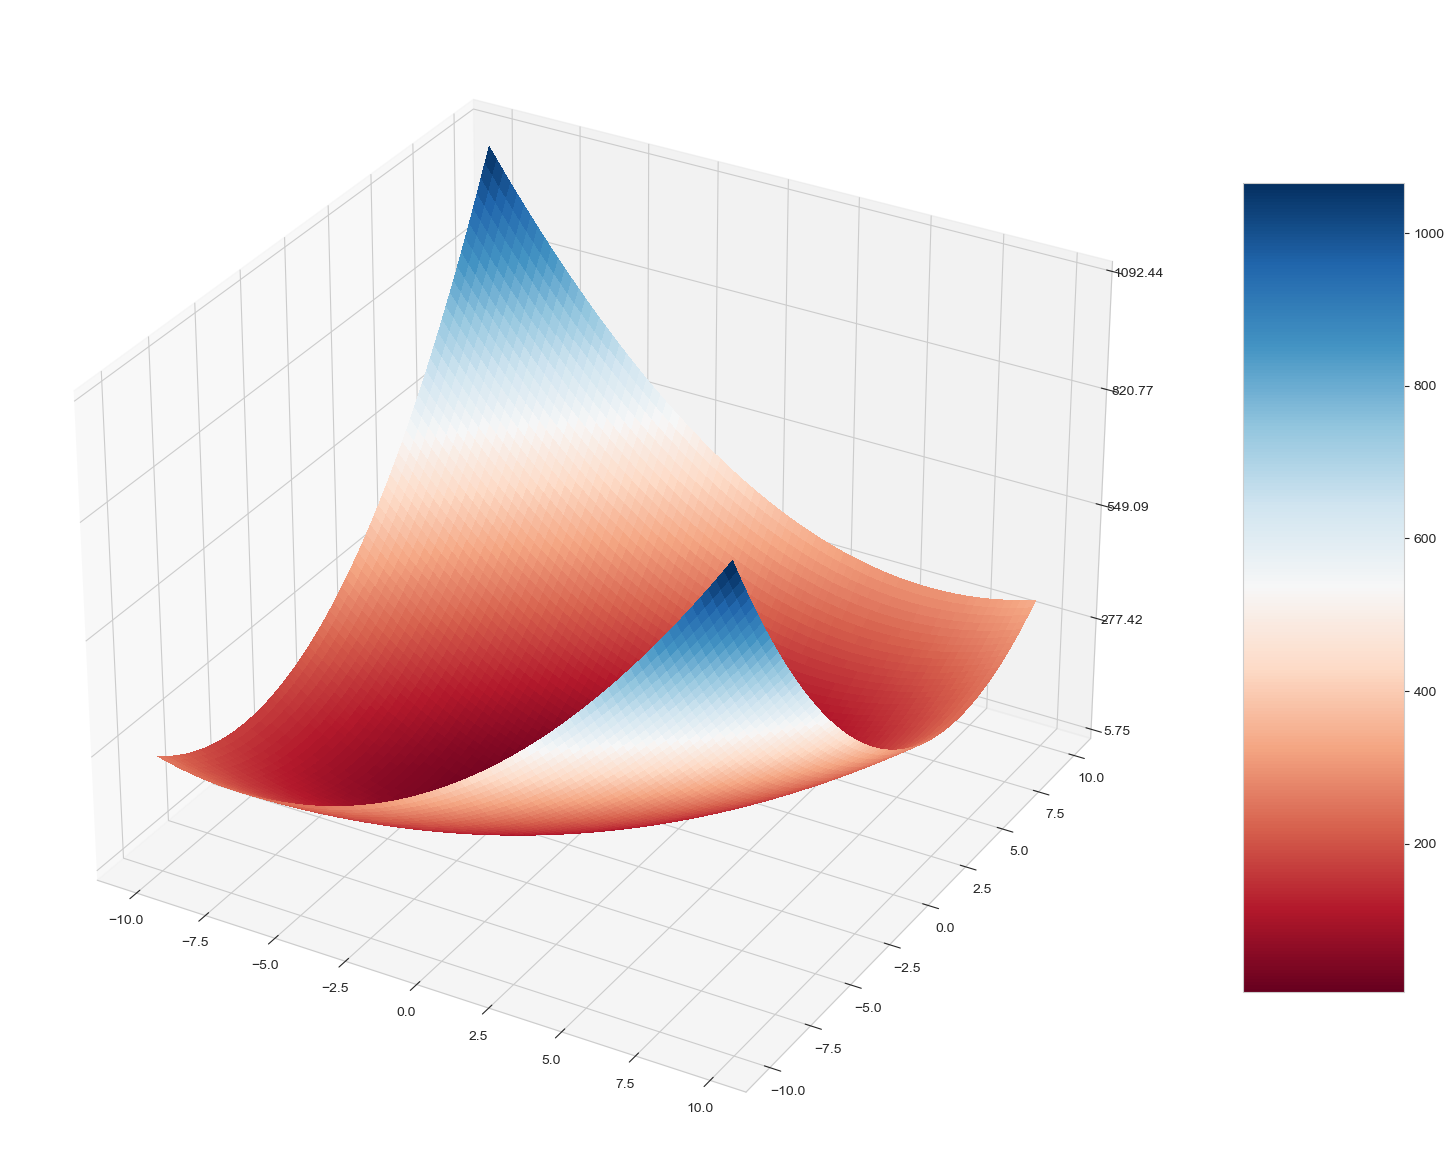

In [5]:
x = np.arange(-10, 10, 0.25)
y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

fig = plt.figure(1, figsize = (20, 15))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.2f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
plt.show()

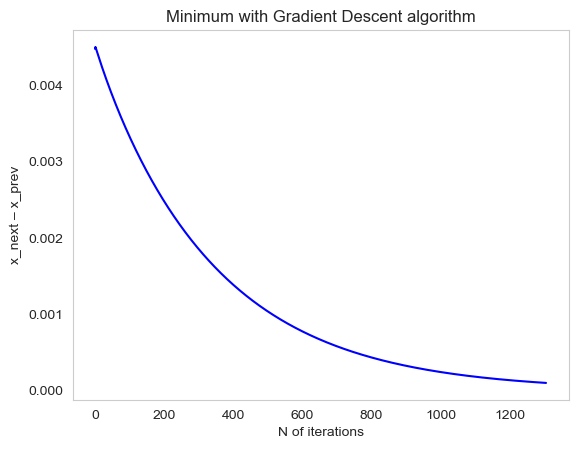

In [6]:
grad_output = gd(vector, np.array([0,0]), 0.01)

euc_dist = [np.linalg.norm(np.array([grad_output[2][i],grad_output[3][i]])-np.array([grad_output[2][i-1],grad_output[3][i-1]])) for i in range(1,grad_output[1]+1)]

plt.grid()
plt.title("Minimum with Gradient Descent")
plt.xlabel("N of iterations")
plt.ylabel("x_next – x_prev")
plt.plot(np.arange(1, grad_output[1]+1, 1), euc_dist, 'b')

In [7]:
print('Minimum with Gradient Descent: %s' %grad_output[0])
print('N of iterations: %s' %grad_output[1])

Minimum with Gradient Descent: [-1.22297122 -0.85389661]
N of iterations: 1305


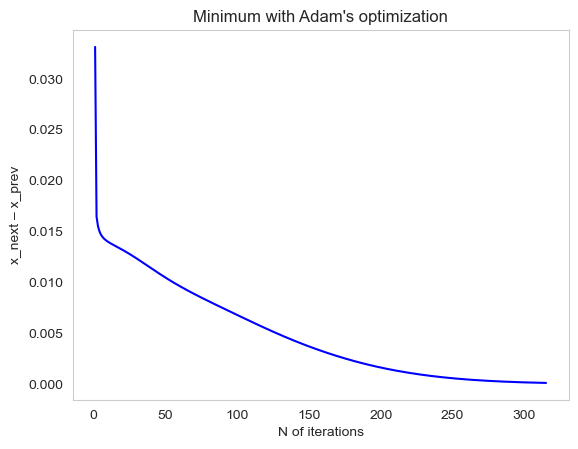

In [8]:
adam_res = adam_optimization(vector, np.array([0,0]), 0.01)
euc_dist = [np.linalg.norm(np.array([adam_res[2][i],adam_res[3][i]])-np.array([adam_res[2][i-1],adam_res[3][i-1]])) for i in range(1,adam_res[1])]
plt.grid()
plt.title("Minimum with Adam's optimization")
plt.xlabel("N of iterations")
plt.ylabel("x_next – x_prev")
plt.plot(np.arange(1, adam_res[1], 1), euc_dist, 'b')

In [9]:
print('Minimum with Adam Optimization: %s' %adam_res[0])
print('N of iterations: %s' %adam_res[1])

Minimum with Adam Optimization: [-1.24750447 -0.87354878]
N of iterations: 316


N of iterations of Adam optimization is almost a 1000 lower than gradient descent, which eventually reached almost the same result.
So, in terms of performance Adam optimization algorithm is way better